In [1]:
from sklearn.feature_extraction import text
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# a.

In [2]:
print('Part a')

def prepare_data(path1, path2):
    #creating fake news dataframe
    with open(path1) as f:
        fake_list = [line.rstrip('\n') for line in f]
    fake_vectorizer = text.CountVectorizer()
    fake = fake_vectorizer.fit_transform(fake_list)
    fake = fake.toarray()
    columns=fake_vectorizer.get_feature_names()
    df_fake = pd.DataFrame(fake, columns=fake_vectorizer.get_feature_names())
    d = {'class': np.ones(fake.shape[0])}
    y_fake = pd.DataFrame(data=d)    
    #creating real news dataframe
    with open(path2) as f:
        real_list = [line.rstrip('\n') for line in f]
    real_vectorizer = text.CountVectorizer()
    real = real_vectorizer.fit_transform(real_list)
    real = real.toarray()
    columns=real_vectorizer.get_feature_names()
    df_real = pd.DataFrame(real, columns=real_vectorizer.get_feature_names())
    d = {'class': np.zeros(real.shape[0])}
    y_real = pd.DataFrame(data=d)
    #concatenating the dataframes
    y_df = pd.concat([y_fake, y_real])
    x_df = df_fake.append(df_real, ignore_index=True, sort=False)
    #filling missing values with mean of column
    x_df = x_df.fillna(x_df.mean())
    #dataset splitting
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=1, shuffle=True)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=1)
    return x_train, x_test, x_val, y_train, y_test, y_val

In [3]:
#giving the path to prepare_data
p1 = 'F:/Uni/991/Pattern/SPR_HW3/SPR_HW3/inputs/P4/clean_fake.txt'
p2 = 'F:/Uni/991/Pattern/SPR_HW3/SPR_HW3/inputs/P4/clean_real.txt'
x_train, x_test, x_val, y_train, y_test, y_val = prepare_data(p1,p2)

# b.

In [5]:
print('Part b')

def knn_model_selection(met):
    #creating lists to save the accuracy for each knn
    #since sklearn knn gets parameter metric, one can change the metric and use this function for both part b and c
    acc_train = list()
    acc_val = list()
    ks = np.arange(1, 20, 1)
    for k in ks:
        #defining and fitting the data
        neigh = KNeighborsClassifier(n_neighbors=k, metric=met)
        neigh.fit(x_train, y_train)
        #calculating the accuracy
        y_pred = neigh.predict(x_val)
        acc_val.append(accuracy_score(y_val, y_pred))
        y_pred = neigh.predict(x_train)
        acc_train.append(accuracy_score(y_train, y_pred))
    plt.plot(np.arange(1, 20, 1),acc_train)
    plt.plot(np.arange(1, 20, 1),acc_val)
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('K-Accuracy (Finding the Best K)')
    plt.show()
    #finding the k that has maximum accuracy
    index = acc_val.index(max(acc_val))
    return ks[index]

Euclidean


C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

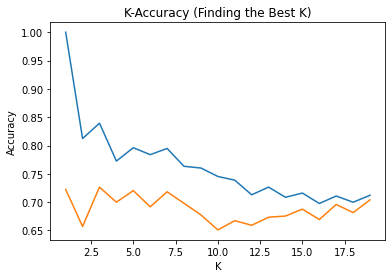

Best K: 3


In [6]:
#trying knn with euclidean distance
print("Euclidean")
k = knn_model_selection('euclidean')
print("Best K:", k)

# c.

Cosine


C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

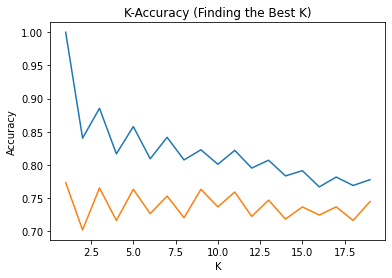

Best K: 1


In [7]:
print('Part c')
#trying knn with cosine distance
print("Cosine")
k = knn_model_selection('cosine')
print("Best K:", k)